### [다양한 차원축소 기법들](https://www.kaggle.com/code/shivamb/dataset-decomposition-techniques)

#### Dataset Preparation

In [1]:
%cd '/content/drive/MyDrive/[EURON] 파이썬 머신러닝 완벽 가이드'

/content/drive/MyDrive/[EURON] 파이썬 머신러닝 완벽 가이드


In [3]:
import pandas as pd
import numpy as np

In [8]:
train = pd.read_csv('data/dp.csv')
target = train['target']
train = train.drop(["target","ID"],axis=1)
print(train.shape)
train.head()

(4459, 4991)


,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler
train_std = StandardScaler().fit_transform(train.values)

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.0,0,0.0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


#### Feature Statistics

In [12]:
feature_df = train.describe().T
feature_df = feature_df.reset_index().rename(columns = {'index' : 'columns'})
feature_df['distinct_vals'] = feature_df['columns'].apply(lambda x : len(train[x].value_counts()))
feature_df['column_var'] = feature_df['columns'].apply(lambda x : np.var(train[x]))
feature_df['column_std'] = feature_df['columns'].apply(lambda x : np.std(train[x]))
feature_df['column_mean'] = feature_df['columns'].apply(lambda x : np.mean(train[x]))
feature_df['target_corr'] = feature_df['columns'].apply(lambda x : np.corrcoef(target, train[x])[0][1])
feature_df.head()

,columns,count,mean,std,min,25%,50%,75%,max,distinct_vals,column_var,column_std,column_mean,target_corr
0,48df886f9,4459.0,14654.930101,3.893298e+05,0.0,0.0,0.0,0.0,20000000.0,32,1.515437e+11,3.892862e+05,14654.930101,0.010188
1,0deb4b6a8,4459.0,1390.894819,6.428302e+04,0.0,0.0,0.0,0.0,4000000.0,5,4.131381e+09,6.427582e+04,1390.894819,0.013805
2,34b15f335,4459.0,26722.450922,5.699652e+05,0.0,0.0,0.0,0.0,20000000.0,29,3.247875e+11,5.699013e+05,26722.450922,0.014694
3,a8cb14b00,4459.0,4530.163714,2.359124e+05,0.0,0.0,0.0,0.0,14800000.0,3,5.564218e+10,2.358860e+05,4530.163714,-0.002917
4,2f0771a37,4459.0,26409.957390,1.514730e+06,0.0,0.0,0.0,0.0,100000000.0,6,2.293893e+12,1.514560e+06,26409.957390,0.016647


In [13]:
len(feature_df[feature_df['column_var'].astype(float) == 0.0])

256

#### PCA

In [16]:
from sklearn.decomposition import PCA

def _get_number_components(model, threshold):
    component_variance = model.explained_variance_ratio_
    explained_variance = 0.0
    components = 0

    for var in component_variance:
        explained_variance += var
        components += 1
        if(explained_variance >= threshold):
            break
    return components

### Get the optimal number of components
pca = PCA()
train_pca = pca.fit_transform(train_std)
components = _get_number_components(pca, threshold=0.85)
components

993

In [17]:
### Implement PCA 
obj_pca = model = PCA(n_components = components)
X_pca = obj_pca.fit_transform(train_std)

#### Truncated SVD

In [20]:
from sklearn.decomposition import TruncatedSVD
obj_svd = TruncatedSVD(n_components = components)
X_svd = obj_svd.fit_transform(train_std)

#### Independent Component Analysis - ICA

In [21]:
from sklearn.decomposition import FastICA
obj_ica = FastICA(n_components = 30)
X_ica = obj_ica.fit_transform(train_std)

#### Factor Analysis

In [22]:
from sklearn.decomposition import FactorAnalysis
obj_fa = FactorAnalysis(n_components = 30)
X_fa = obj_fa.fit_transform(train_std)

#### Non Negative Matrix Factorization

In [25]:
from sklearn.decomposition import NMF
obj = NMF(n_components = 2)
X_nmf = obj.fit_transform(train)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


#### t-SNE

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=42, n_iter=500)
tsne_results = tsne_model.fit_transform(X_svd)

#traceTSNE = go.Scatter(
#    x = tsne_results[:,0],
#    y = tsne_results[:,1],
#    name = target,
#     hoveron = target,
#    mode = 'markers',
#    text = target,
#    showlegend = True,
#    marker = dict(
#        size = 8,
#        color = '#c94ff2',
#        showscale = False,
#        line = dict(
#            width = 2,
#            color = 'rgb(255, 255, 255)'
#        ),
#        opacity = 0.8
#    )
#)
#data = [traceTSNE]

#layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
#              hovermode= 'closest',
#              yaxis = dict(zeroline = False),
#              xaxis = dict(zeroline = False),
#              showlegend= False,
#
#
#fig = dict(data=data, layout=layout)
#iplot(fig)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4459 samples in 0.004s...
[t-SNE] Computed neighbors for 4459 samples in 1.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4459
[t-SNE] Computed conditional probabilities for sample 2000 / 4459
[t-SNE] Computed conditional probabilities for sample 3000 / 4459
[t-SNE] Computed conditional probabilities for sample 4000 / 4459
[t-SNE] Computed conditional probabilities for sample 4459 / 4459
[t-SNE] Mean sigma: 0.184561
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.329651
[t-SNE] KL divergence after 500 iterations: 2.750554


### [이미지 데이터 차원축소 mnist 예제](https://www.kaggle.com/code/ohseokkim/the-curse-of-dimensionality-dimension-reduction)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


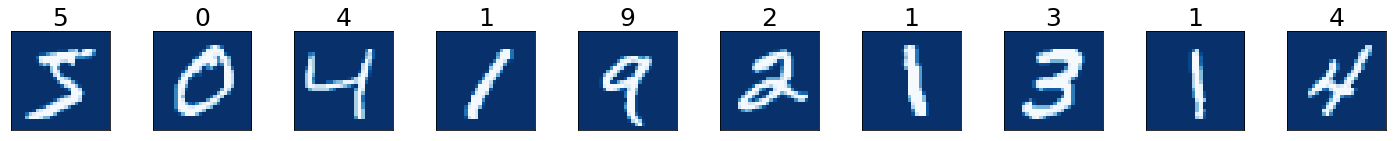

In [34]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(train_x[idx], cmap='Blues_r')
    ax.set_title(str(train_y[idx]),fontsize=25)

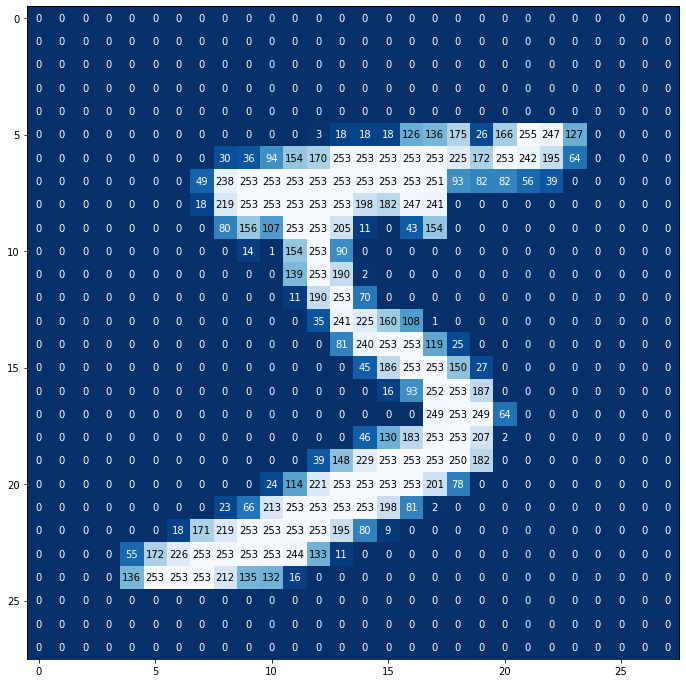

In [35]:
img = train_x[0]

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='Blues_r')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [36]:
# Reshape to 2D data
train_x = train_x.reshape(train_x.shape[0], -1)
print(train_x.shape)

sample_size = 5000
# Use only the top 1000 data for training
train_x = pd.DataFrame(train_x[:sample_size, :])
train_y = train_y[:sample_size]

(60000, 784)


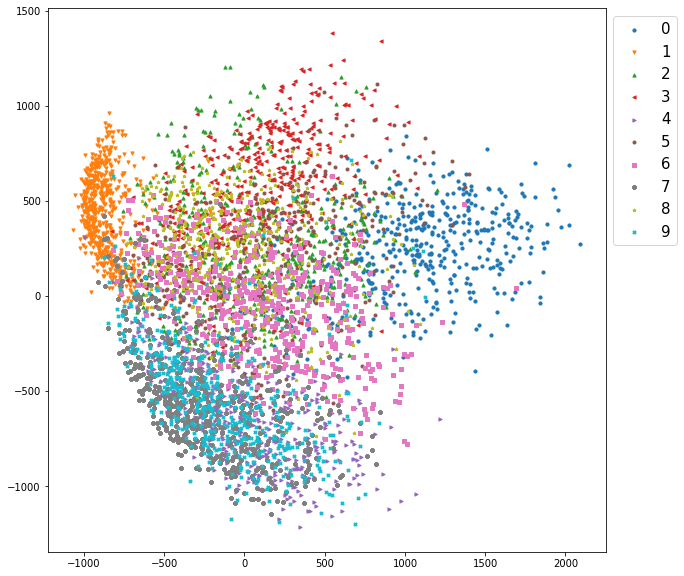

In [37]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

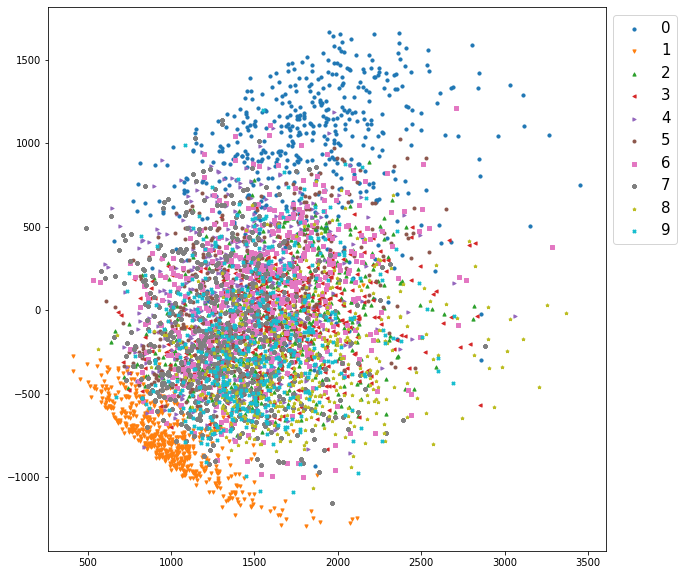

In [38]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD()
x_tsvd = tsvd.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_tsvd[mask, 0], x_tsvd[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

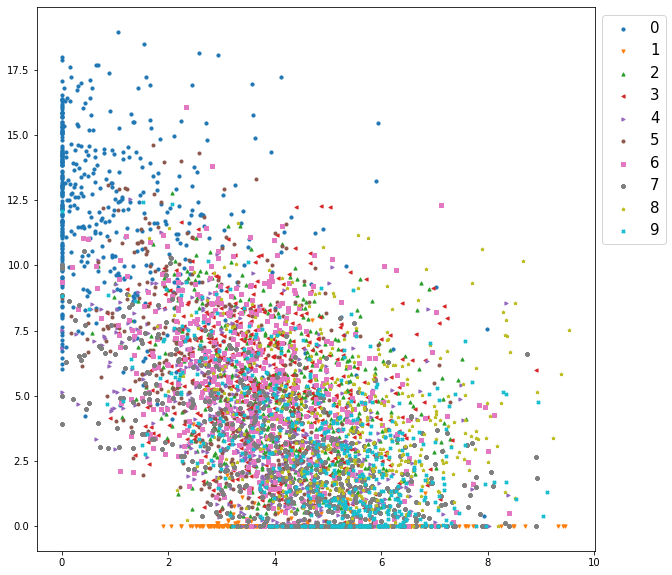

In [39]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=2, init='random', random_state=0)
x_nmf = nmf.fit_transform(train_x)
markers=['o','v','^','<','>','8','s','P','*','X']
# plot in 2D by class
plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_nmf[mask, 0], x_nmf[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

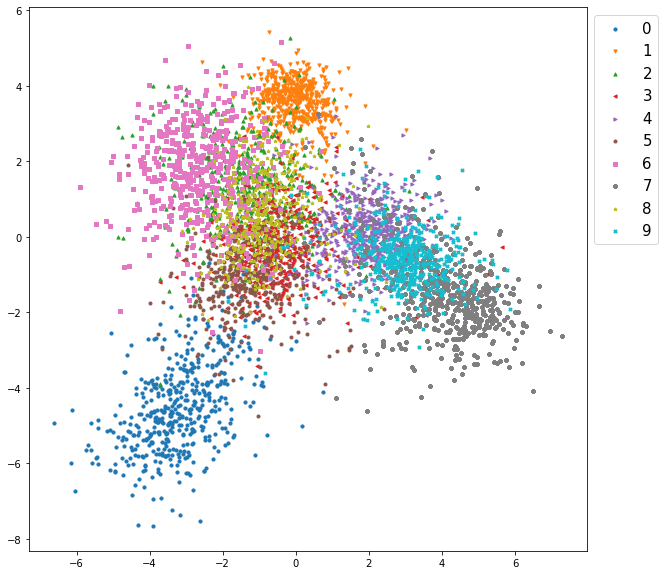

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
x_lda = lda.fit_transform(train_x, train_y)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_lda[mask, 0], x_lda[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



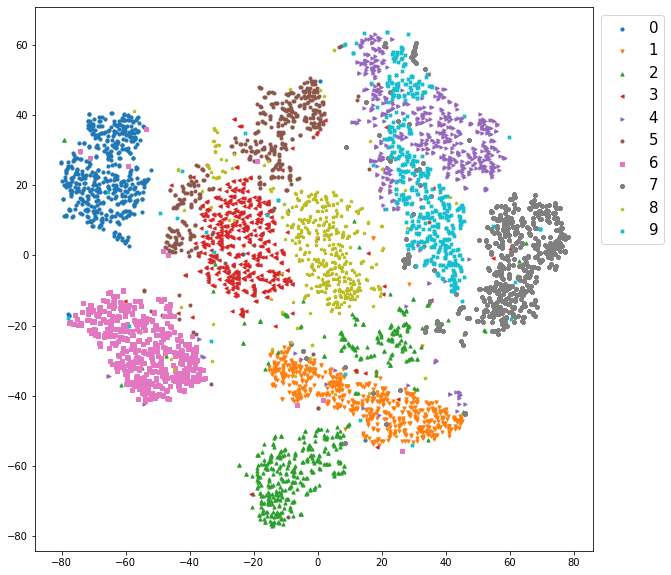

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_tsne[mask, 0], x_tsne[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

In [44]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 2.2 MB/s 
     |████████████████████████████████| 76 kB 5.5 MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=09f3d0e902ba49279c2aefc26d3b5efabdf239337a84cb3a30b30b0bf880826b
  Stored in directory: /root/.cache/pip/wheels/b5/b7/80/333a5c3312ed4cd54f5d5b869868c14e0c6002cb5c7238b52d
Successfully built datashape


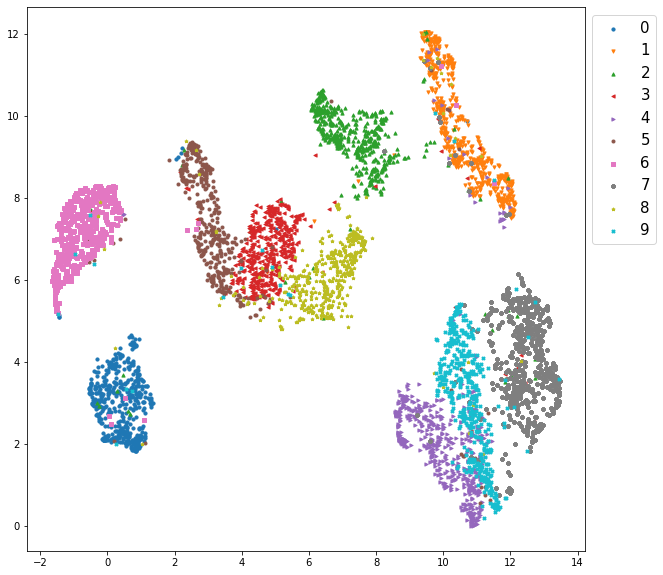

In [45]:
import umap

um = umap.UMAP()
x_umap = um.fit_transform(train_x)

plt.figure(figsize=(10,10))
for i,marker in enumerate(markers):
    mask = train_y == i
    plt.scatter(x_umap[mask, 0], x_umap[mask, 1], label=i, s=10, alpha=1,marker=marker)
plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left',fontsize=15)

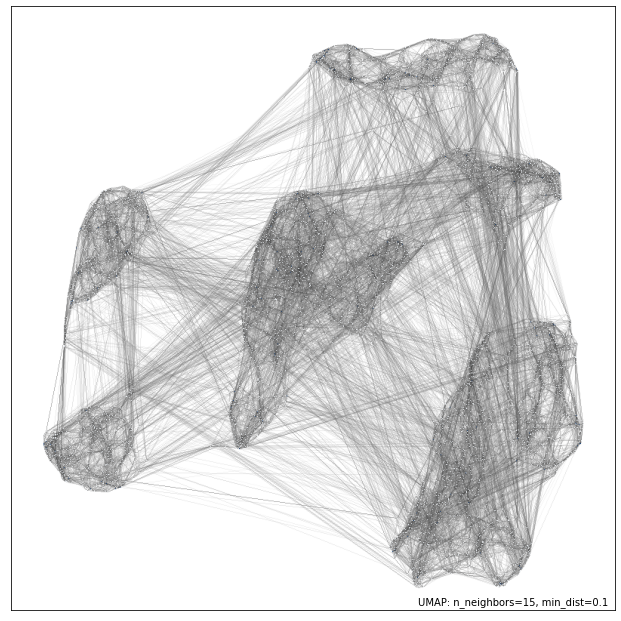

In [48]:
import umap.plot
mapper = umap.UMAP().fit(train_x)
umap.plot.connectivity(mapper, show_points=True)

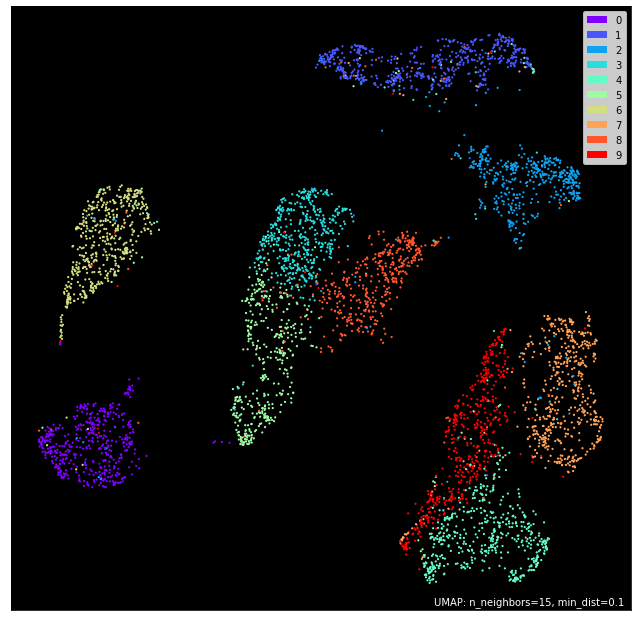

In [49]:
umap.plot.points(mapper, labels=train_y, theme='fire')

In [50]:
import plotly
import plotly.express as px
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(train_x)
umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(train_y,name='label')
print(type(x_umap))
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='label', labels={'color': 'number'}
)
fig.update_traces(marker_size=1)
fig.show()

<class 'numpy.ndarray'>
